# Linear Regression on Student Performance Dataset

Here, we will train __Linear Regression__ to predict to predict students __final grade__ '$G3$' given other features and perform necessary evaluations to check the model performance.


### Dataset Information:

| Attribute    | Description                                                                                                                                       | Type     | Values/Range                                                 |
|--------------|---------------------------------------------------------------------------------------------------------------------------------------------------|----------|--------------------------------------------------------------|
| school       | Student's school                                                                                                                                  | Binary   | 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira           |
| sex          | Student's sex                                                                                                                                     | Binary   | 'F' - female, 'M' - male                                      |
| age          | Student's age                                                                                                                                     | Numeric  | 15 - 22                                                      |
| address      | Student's home address type                                                                                                                       | Binary   | 'U' - urban, 'R' - rural                                      |
| famsize      | Family size                                                                                                                                       | Binary   | 'LE3' - less or equal to 3, 'GT3' - greater than 3            |
| Pstatus      | Parent's cohabitation status                                                                                                                      | Binary   | 'T' - living together, 'A' - apart                            |
| Medu         | Mother's education                                                                                                                                | Numeric  | 0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education |
| Fedu         | Father's education                                                                                                                                | Numeric  | 0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education |
| Mjob         | Mother's job                                                                                                                                      | Nominal  | 'teacher', 'health', 'civil services', 'at_home', 'other'     |
| Fjob         | Father's job                                                                                                                                      | Nominal  | 'teacher', 'health', 'civil services', 'at_home', 'other'     |
| reason       | Reason to choose this school                                                                                                                      | Nominal  | 'home', 'reputation', 'course', 'other'                      |
| guardian     | Student's guardian                                                                                                                                | Nominal  | 'mother', 'father', 'other'                                  |
| traveltime   | Home to school travel time                                                                                                                        | Numeric  | 1 - <15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, 4 - >1 hour |
| studytime    | Weekly study time                                                                                                                                 | Numeric  | 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours |
| failures     | Number of past class failures                                                                                                                     | Numeric  | 0, 1, 2, 3, 4                                                |
| schoolsup    | Extra educational support                                                                                                                         | Binary   | 'yes', 'no'                                                  |
| famsup       | Family educational support                                                                                                                        | Binary   | 'yes', 'no'                                                  |
| paid         | Extra paid classes within the course subject                                                                                                      | Binary   | 'yes', 'no'                                                  |
| activities   | Extra-curricular activities                                                                                                                       | Binary   | 'yes', 'no'                                                  |
| nursery      | Attended nursery school                                                                                                                           | Binary   | 'yes', 'no'                                                  |
| higher       | Wants to take higher education                                                                                                                    | Binary   | 'yes', 'no'                                                  |
| internet     | Internet access at home                                                                                                                           | Binary   | 'yes', 'no'                                                  |
| romantic     | With a romantic relationship                                                                                                                      | Binary   | 'yes', 'no'                                                  |
| famrel       | Quality of family relationships                                                                                                                   | Numeric  | 1 - very bad to 5 - excellent                                |
| freetime     | Free time after school                                                                                                                            | Numeric  | 1 - very low to 5 - very high                                |
| goout        | Going out with friends                                                                                                                            | Numeric  | 1 - very low to 5 - very high                                |
| Dalc         | Workday alcohol consumption                                                                                                                       | Numeric  | 1 - very low to 5 - very high                                |
| Walc         | Weekend alcohol consumption                                                                                                                       | Numeric  | 1 - very low to 5 - very high                                |
| health       | Current health status                                                                                                                             | Numeric  | 1 - very bad to 5 - very good                                |
| absences     | Number of school absences                                                                                                                         | Numeric  | 0 to 93                                                      |
| G1           | First period grade                                                                                                                                | Numeric  | 0 to 20                                                      |
| G2           | Second period grade                                                                                                                               | Numeric  | 0 to 20                                                      |
| G3           | __Final grade__ (target)                                                                                                                              | Numeric  | 0 to 20                                                      |

</br>

> __Note:__ the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.




### 1. Downloading Datasets

In [1]:
# Install Kaggle to download datasets
!pip install kaggle

In [4]:
!kaggle datasets download larsen0966/student-performance-data-set
!unzip student-performance-data-set.zip 

Dataset URL: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set
License(s): CC0-1.0
student-performance-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance-data-set.zip


### 2. Reading Datasets

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the csv data
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
# Checking null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
print("Shape of dataframe:", df.shape)

Shape of dataframe: (649, 33)


### 3. Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["G3"], axis=1)
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=0
) 

len(y_train), len(y_test)

(519, 130)

### 4. Plot Histograms 

Histogram displays data using bars of different heights. This is particularly important to check the distribution of the data i.e. shape and spread of the data. It can also show existence of outliers or imbalance in categories inside the data.

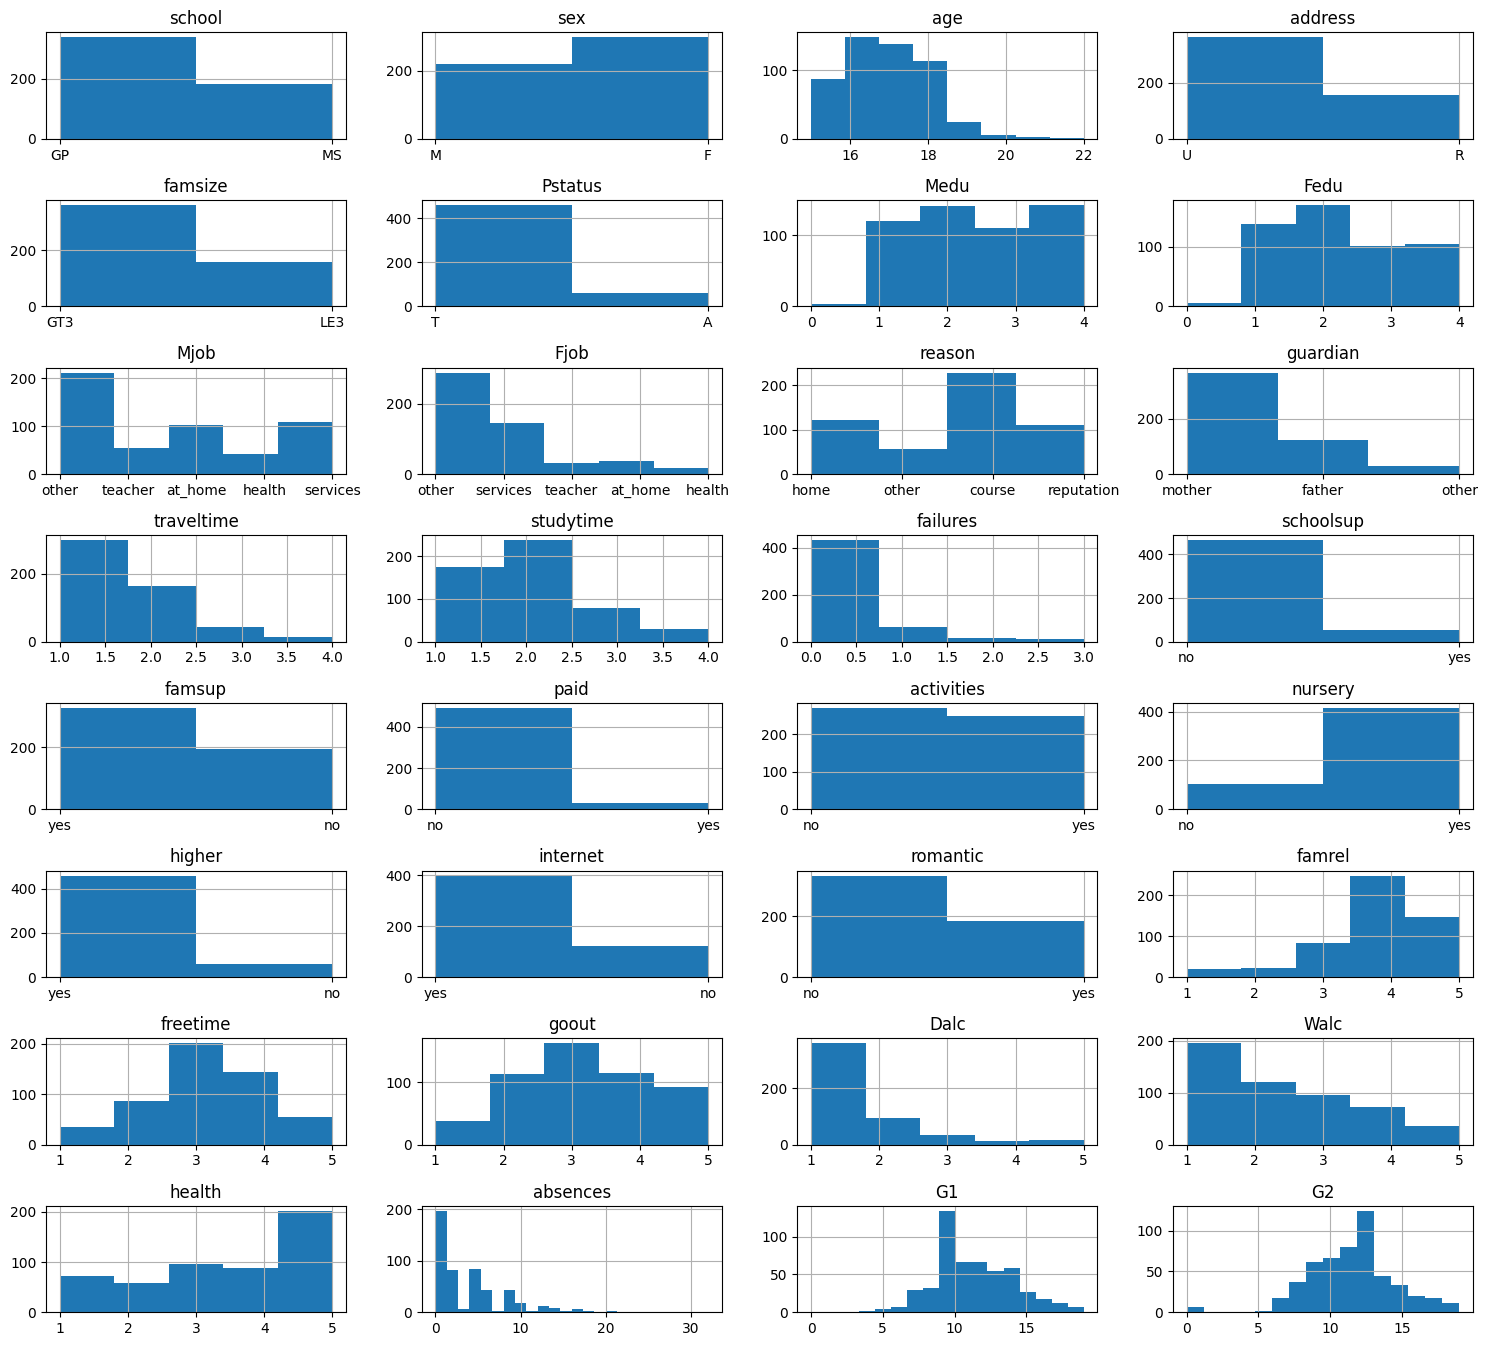

In [8]:
def plot_hist(df, ncols=5):
    """Plots histogram of all the column in the dataframe"""

    n = len(df.columns)
    nrows = round(n/ncols) + 1
    f = plt.figure()
    for indx in range(n):
        col = df.columns[indx]
        f.set_figheight(15)
        f.set_figwidth(15)
        plt.subplot(nrows, ncols, indx+1, title=col)
        df[col].hist(bins=len(df[col].unique()))

    plt.tight_layout()
    plt.show()

plot_hist(X_train, 4)

### 5. Scatterplot

A __scatter plot__ (or scattergram) is a type of data visualization that uses dots to represent the values obtained for two different variables—one plotted along the x-axis and the other plotted along the y-axis.


In [9]:
import seaborn as sns

def scatter_plot(x, y, data):
  """ Scatter Plot """
  plt.figure(figsize=(8, 4))
  sns.scatterplot(x=x, y=y, data=data)
  plt.title(f"Scatter plot between {x.name} and {y.name}")
  plt.show()

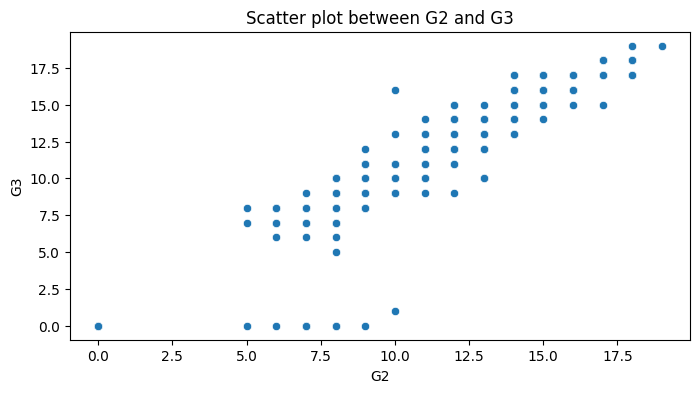

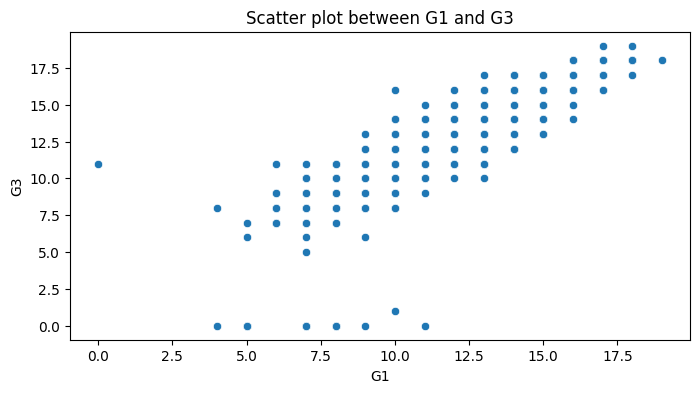

In [9]:
scatter_plot(df['G2'], df['G3'], df)
scatter_plot(df['G1'], df['G3'], df)

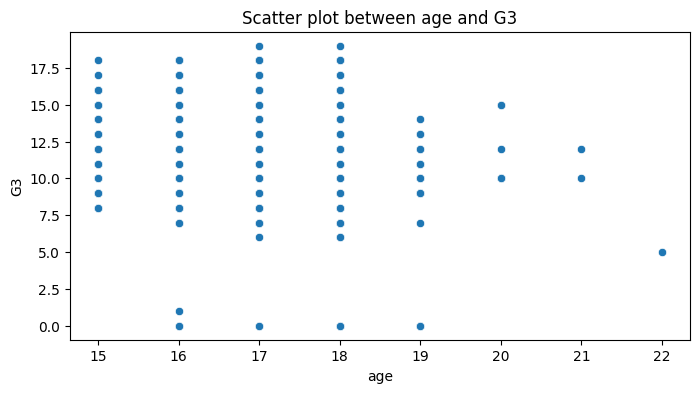

In [12]:
scatter_plot(df['age'], df['G3'], df)

### 5. Finding Correlations

Checking the correlation of all the numerical features with target $G3$ and extracting the top 5 features among the variable `top_five`


In [10]:
# Get correlation between features and target
correlation = X_train.select_dtypes("number").corrwith(y_train)

# List of top 5 features based on correlation with target variable
top_five = np.abs(correlation).sort_values(ascending=False).iloc[0:5].index

print("Correlation of all numerical val. with G3:\n", correlation)
print("\nTop five correlated features with G3:\n", top_five)

Correlation of all numerical val. with G3:
 age          -0.114866
Medu          0.270680
Fedu          0.199367
traveltime   -0.143867
studytime     0.234813
failures     -0.407092
famrel        0.085233
freetime     -0.124725
goout        -0.086859
Dalc         -0.220884
Walc         -0.189444
health       -0.083055
absences     -0.068426
G1            0.824860
G2            0.916903
dtype: float64

Top five correlated features with G3:
 Index(['G2', 'G1', 'failures', 'Medu', 'studytime'], dtype='object')


In [12]:
correlation[top_five]

G2           0.916903
G1           0.824860
failures    -0.407092
Medu         0.270680
studytime    0.234813
dtype: float64

### 6. Fit Linear Regression Model on `top_five` features

In [14]:
from sklearn.linear_model import LinearRegression

# Get filtered X_train of top 5 features 
X_train_top5_feat = X_train[correlation[top_five].index]

# Instantiate Logistic Regression and fit on the train dataset 
reg_top5 = LinearRegression(fit_intercept=True)
reg_top5.fit(X_train_top5_feat, y_train)

# Get the required value of coeff. and intercept
theta = reg_top5.coef_
intercept = reg_top5.intercept_

print(f"Value of Theta: {theta} and\nIntercept {intercept}")

Value of Theta: [ 0.91227849  0.13958643 -0.23260969 -0.05957482  0.08179232] and
Intercept -0.2045099471389431


### 7. Model Prediction

In [15]:
# Display filtered X_test of top 5 features 
X_test[top_five].head()

,G2,G1,failures,Medu,studytime
532,7,9,0,2,2
375,14,14,0,0,3
306,16,15,0,3,2
625,10,10,0,2,1
480,9,9,1,2,1


In [16]:
y_test.head()

532     8
375    15
306    16
625    10
480    10
Name: G3, dtype: int64

In [17]:
# Get filtered X_test of top 5 features
X_test_top_five = X_test[correlation[top_five].index]

# Predict along filtered X_test of top 5 features
y_pred = reg_top5.predict(X_test_top_five)

# Display prediction of 5 X_test
y_pred[:5]  

array([ 7.48215231, 14.76697581, 16.47060244, 10.27678188,  8.99230728])

### 8. Model Evaulation

Lets check hows our model is performing using `rmse` also known as __root mean square__.

### Root Mean Squared Error (RMSE)

**Definition**: RMSE is a common metric for evaluating the performance of regression models. It measures the average magnitude of the error between the predicted values and the actual values, giving a higher weight to large errors. RMSE answers the question: "What is the typical magnitude of error in the model’s predictions?"

RMSE is particularly useful when large errors are more concerning because the errors are squared before averaging, making it sensitive to outliers.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}$$

Where:
- $n$ is the number of observations,
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $y_i - \hat{y}_i$ represents the error for each observation.

### Interpretation:
- **Lower RMSE**: Indicates that the model's predictions are closer to the actual values.
- **Higher RMSE**: Suggests that the model has larger errors, making predictions less reliable.


In [18]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

# Calculate accuracy
rmse = np.sqrt(mse(y_test, y_pred))
print("Rmse of Linear Reg. Model with top 5 features:", round(rmse, 3))

Rmse of Linear Reg. Model with top 5 features: 0.999


> The above setup only uses top five highly correlated features, which happens to be all numeric in this case. We should be able to also account for other variables which are categorical in nature.


### 9. Variable Encoding

Machine learning algorithms cannot understand categorical straings such as student's sex (Male '$M$' or Female '$F$') unlesss we convert them to numerical values 0:'$F$' and 1:'$M$'. We can do this using __Label Encoding__.

__Label Encoding__ assigns a value from 1 through N for each category for the feature, here we are assuming there are N categories. 

Example: Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) has already been encoded numerically.

Label Encoder assumes that there is some order in the data, i.e., value 2 is greater than value 1, which is good if the data is ordinal but it is not suitable for nominal data types without any inherent order, such as mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other'), in such cases we need to perform some other encoding method, such as one-hot Encoding

__One-hot Encoding__ maps each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. Hence, this method will create multiple columns based on the features' cardinality, i.e., the number of categories in the feature. For: e.g.: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other') has four different categories. Hence four columns will be created.

More about different [__types of encoding__](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02).


In [19]:
# List all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [20]:
numeric_columns = [col for col in numeric_columns if col != "G3"]
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [21]:
# Get binary (categorical) columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
binary_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [22]:
# Get nominal (categorical) columns
nominal_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
nominal_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [23]:
# Include only those nominal categories which are not listed in binary categories
nominal_columns_binary_excluded = list(set(nominal_columns) - set(binary_columns))
nominal_columns_binary_excluded

['Fjob', 'Mjob', 'guardian', 'reason']

In [24]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
34,GP,M,16,U,GT3,T,3,2,other,other,...,no,5,4,3,1,1,5,4,12,12
432,MS,F,17,R,GT3,T,1,1,other,other,...,no,5,4,4,2,2,5,0,6,6
399,GP,F,18,U,GT3,T,3,2,other,services,...,yes,5,4,3,2,3,1,4,14,16
346,GP,M,17,U,LE3,T,4,4,other,teacher,...,no,4,1,1,2,2,5,0,12,13
542,MS,F,16,U,GT3,T,4,4,teacher,services,...,yes,5,3,5,1,4,5,1,10,11


In [25]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df, binary, nominal):
    """ Label Encoding """
    df[binary] = df[binary].apply(LabelEncoder().fit_transform)
    df = pd.get_dummies(df, columns=nominal, prefix=nominal)
    return df

X_train = preprocess(X_train, binary_columns, nominal_columns_binary_excluded)
X_test = preprocess(X_test, binary_columns, nominal_columns_binary_excluded)

X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_other,Mjob_services,Mjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
34,0,1,16,1,0,1,3,2,1,1,...,True,False,False,False,True,False,False,True,False,False
432,1,0,17,0,0,1,1,1,1,1,...,True,False,False,True,False,False,False,False,True,False
399,0,0,18,1,0,1,3,2,1,3,...,True,False,False,False,True,False,False,False,True,False
346,0,1,17,1,1,1,4,4,2,1,...,True,False,False,True,False,False,False,True,False,False
542,1,0,16,1,0,1,4,4,2,3,...,False,False,True,False,True,False,True,False,False,False


### 10. Fit Linear Regression model on all Features

In [26]:
reg_all = LinearRegression(fit_intercept=True)
reg_all.fit(X_train, y_train)

theta_all = reg_all.coef_
intercept_all = reg_all.intercept_

print(f"Using all features the value of Theta: \n{theta_all} \nand Intercept: \n{intercept_all}")

Using all features the value of Theta: 
[-1.87278468e-01 -1.62378199e-01  9.09456103e-03  1.33597025e-01
  4.40034845e-02 -1.42853649e-01 -1.13354945e-01  2.80499496e-02
  1.44464618e-01  4.74388238e-02 -2.86362424e-01 -1.64187030e-01
  9.97129147e-02 -3.21677874e-01  1.14795028e-01 -1.58087672e-01
  1.03862547e-01 -2.83904681e-03 -8.21522202e-02 -4.07862046e-02
 -4.41706849e-02 -1.30411151e-02 -1.73279716e-02 -4.30448803e-02
 -4.31998531e-02  1.52676501e-02  1.26901971e-01  9.03800541e-01
  5.91370403e+11  5.91370403e+11  5.91370403e+11  5.91370403e+11
  5.91370403e+11  2.85003270e+11  2.85003270e+11  2.85003270e+11
  2.85003270e+11  2.85003270e+11 -3.89093157e+11 -3.89093157e+11
 -3.89093157e+11 -7.29538232e+11 -7.29538232e+11 -7.29538232e+11
 -7.29538232e+11] 
and Intercept: 
242257715762.48297


### 11. Model Prediction and Evaluation

### Mean Absolute Error (MAE)

**Definition**: MAE is a common metric used to measure the average magnitude of errors between the predicted values and the actual values, without considering their direction (positive or negative). It answers the question: "On average, how much are the predicted values off from the actual values?"

MAE is the average of the absolute errors, giving a sense of how far off the predictions are in real units.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

Where:
- $n$ is the number of observations,
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $|y_i - \hat{y}_i|$ represents the error for each observation.

### Key Points:
- **MAE vs RMSE**: Unlike RMSE, MAE does not square the errors, meaning it is less sensitive to large errors or outliers. RMSE tends to penalize larger errors more heavily due to squaring, while MAE treats all errors equally.
- **Units**: MAE is in the same units as the target variable, making it easier to interpret.
- **Lower MAE**: Indicates better model performance, meaning the average error is small.

If you'd like to compute the MAE for your model, I can assist with that!

In [27]:
y_pred_all = reg_all.predict(X_test)
mae_value  = mae(y_test, y_pred_all)
rmse_value = np.sqrt(mse(y_test, y_pred_all))

print("rmse: ", rmse_value, "\nmae: ", mae_value)

rmse:  1.011064362497179 
mae:  0.752984619140625


### 12. Are these values good enough?

How can we make sure that the RMSE, MAE values. One common method is to use a baseline model. A baseline model is a simple model that predicts in a very simple manner such as always predicting the mean value.

In [28]:
from sklearn.dummy import DummyRegressor

base_model = DummyRegressor(strategy='mean')
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

mae_base  = mae(y_test, y_pred)
rmse_base = np.sqrt(mse(y_test, y_pred))

print("rmse: ", rmse_base, "\nmae: ", mae_base)

rmse:  2.6811189157355257 
mae:  2.0588706091596265


> We can see here, our model is performing better than the baseline model.

## Using Model for Prediciton

In [35]:
X_train[['G2', 'G1', 'failures', 'Medu', 'studytime']].head()

,G2,G1,failures,Medu,studytime
34,12,12,0,3,1
432,6,6,1,1,1
399,16,14,0,3,3
346,13,12,0,4,1
542,11,10,0,4,3


In [36]:
y_train.head()

34     12
432     7
399    17
346    13
542    12
Name: G3, dtype: int64

In [38]:
# Sample data for the top 5 features with correct feature names
pred_sample = [[11, 10, 0, 4, 3]]
feature_names = ['G2', 'G1', 'failures', 'Medu', 'studytime']

# Converting into DataFrame
prediction_df = pd.DataFrame(pred_sample, columns=feature_names)

# Predict 
pred = reg_top5.predict(prediction_df)
print(pred)

[11.23349536]
